# Basic Machine Learning Prediction- TITANIC

### by Diego Garrocho

## Table of Content (expected)
---
1. Problem Definition
2. Main Objectives
3. Data requirements
4. Data Cleaning
5. Model building


## 1. Problem Definition
---
On the year 1912, a vessel known as the TITANIC sank during its maiden voyage due to a collision with an iceberg. Sadly, the great ship began its journey without having enough lifeboats available for every passenger on the ship. As the ship sank, a total of 1502 out of 2224 lifes were lost which can be translated as having a rate of survival of 32%. Within the survivors we expect to find which groups of people (if any) were most likely to survive.

## 2. Main Objetives
---
- Classifying passengers into groups
- Establishing a correlation between groups and survival rates

## 3. Data requirements
---
All data has been provided by Kaggle directly and is delivered in 2 tables, which are meant for training and testing respectively.
The provided variables are: survival, socio-economic status, age, siblings and spouses, parents and children, ticket number, fare, cabin, port.


### Basic tools

In [ ]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### Tables into pandas + combining

In [ ]:
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')
combine = [train_df, test_df]

In [ ]:
#Check of it working
print(train_df.columns.values, test_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked'] ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


## 4. Data Cleaning
---
Understanding cualitative and cuantitative data.
* Cualitative: Survival, Gender, Embarked, Pclass
* Cuantitative: Age, Fare, Sibsp, Parch

In [ ]:
#Quick table org check
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Noting Ticket data as mixed between alphanumeric and numeric for correction besides checking for typos and different names for the same objects. Same with finding empty or null values within the tables.

In [ ]:
#checking for data types and null values
train_df.info()
print ('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

With the .info() we can also observer the amount of data given in the tables which is smaller than the sample expected but still works.

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Having done this, we can find some interesting data like the mean age of the accounted passengers or that the previous survival rate provided to us was accurate. One should also note that there are values missing for some of the passengers in the age column.

In [ ]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Masselmani, Mrs. Fatima",male,1601,G6,S
freq,1,577,7,4,644


Here we get more insight about the data given to us like how male was the predominant gender having 577 out of the total 891 translating as 65%. Other interesting thing to note here is that we can deduce that given the number of unique cabin numbers compared to the total count either several passengers shared cabins or there is an off chance that the data is duplicated for some cabins. One can also note that an expected value for unique tickets would be for it to be the same as the total count but we also find that a 22% of them are repeated which makes the ticket data not seem reliable to consider within the analysis.

### Summery of observations made:
* Some of the data needing correcting might prove more detrimental than beneficial to use as is the case with: Tickets and Cabin info
* Other parts of the data have no effect on the survival rate which allows us to exclude them too: Name and Passengerid
* The Embarked feature might prove interesting to see if is related to the survival rate we are looking for.
* Some of the features could be mixed into a single one to make it easier to analyse, such is the case with the data regarding relatives traveling together.
* Features like Age and Fare could also be further modified for their easier use (ex. not taking age as a continous numerical and adding a range to fare).

## Analysis
---

### Initial assumptions:
* Children are the most likely age group to survive 
* Female would be the expected gender to be the majority of survivors
* Among the males the young adults are the least expected to be among the survivors
* The higher class passengers are expected to have a higher survival rate

### Quick correlation of features
(btw pclass refers to ticket class, sibsp to # of siblings/spouses aboard, parch to # of parents / children aboard)

In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


We find a correlation with the ticket class 1 and also find a strong correlation (>0.7) involving the female gender(expected). Also worth noting that there are certain values which return a 0 for correlation in the SibSp and Parch features and that we might consider taking out in further analysis.

### By visualization
---
By the use of histogram charts we find it easier to understand how Age is related to survival rate which is within the intial assumptions.

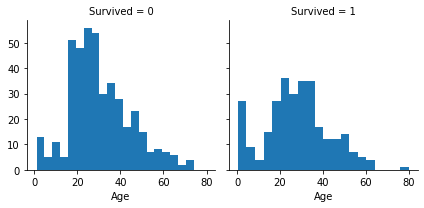

In [ ]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Notable observations:
* Most passengers were among 15 and 35 years old
* Biggest losses were among 15 and 25 years old
* Infants and children have a high survival rate
* Oldest recorded passengers also survived

### Correlating numerical with categorical features
In this instance the correlation to observe is Pclass(Ticket class) and Age with Survival

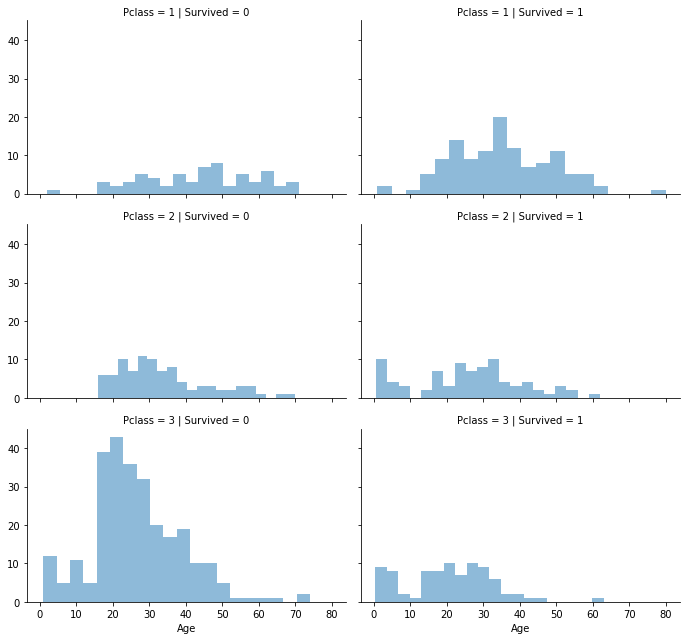

In [ ]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=3, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Notable observations:
* Pclass 3 had the most passengers but as seen before had the lowest survival rate among the Ticket classes
* Excluding Pclass 3 almost all of the children survived
* Pclass 1 had the most survivals as was proven before
* There is a relation between the ages of passengers and the ticket class they had
* Consider Pclass for model training

### Correlating categorical features
Pclass, Survived, and Gender in relation to where they embarked

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


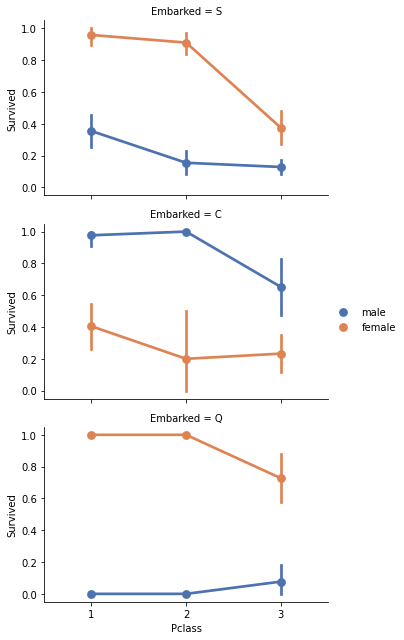

In [ ]:
grid = sns.FacetGrid(train_df, row='Embarked', height=3, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

Notable observations:
* In 2/3 of Embarked settings the female gender was drastically higher regarding survival
* Embarked proved to have different rates considering Pclass
* Consider Gender and Embarked for training model

### Correlating categorical with numerical features
Mainly looking into the Fare feature

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


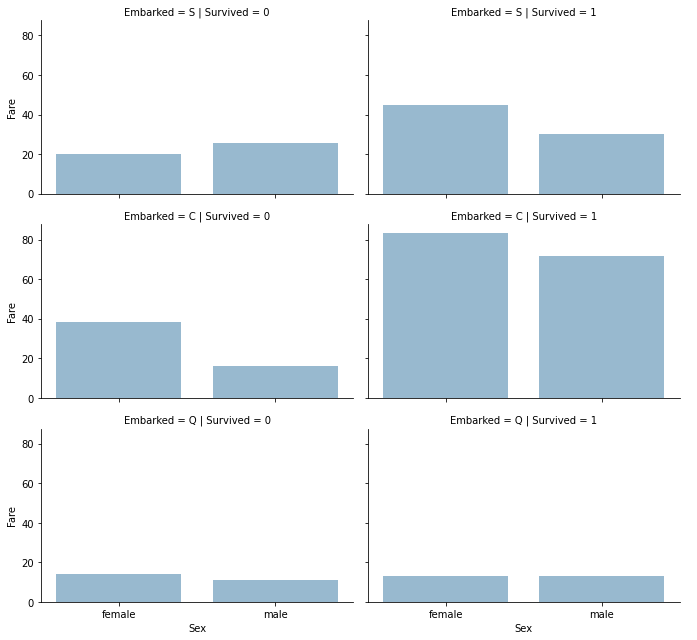

In [ ]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=3, aspect= 1.6 )
grid.map(sns.barplot, 'Sex', 'Fare', alpha=0.5, ci=None)
grid.add_legend()

Notable observations:
* Having a higher fare correlates with a better survival rate
* Consider banding Fare feature too

## Data Correcting
---
Dropping, correcting, creating features

### Dropping
From previous observations we can safely take out the Ticket and Cabin features.

In [ ]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
train_df = train_df.drop(['Ticket','Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


### Creating
It might prove useful to create a feature from Name that extracts the Titles and see if it correlates with survival.

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Now we group the different titles that are meant to be the same and also classify some of the titles as rare and see if it impacts the survival rate of each.

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


For further analysis we turn the categorical into ordinal.

In [ ]:
title_mapping= {"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5 }
for dataset in combine:
    dataset['Title']= dataset['Title'].map(title_mapping)
    dataset['Title']= dataset['Title'].fillna(0)
    
#Quick check if title worked
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Having extracted the title feature from Name we can now discard the original feature entirely, as well as taking out PassengerId as it was planned on the previous observations made.

In [ ]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### Converting
In order to prepare for the model implementation we turn categorical features (Sex) into numerical ones. 

In [ ]:
#male = 0 and female = 1
for dataset in combine:
    dataset['Sex']= dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)
    
#Quick check if it works
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Completing
Some of the features had null or incomplete values we can estimate and complete such as in Age. We can create a pretty solid estimate of the missing age values by working with the correlations established with Ticket class and Gender.

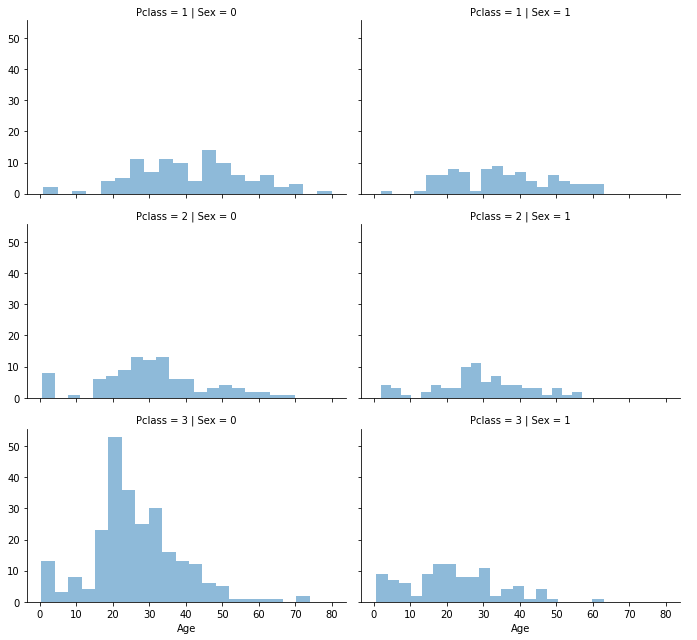

In [ ]:
grid= sns.FacetGrid(train_df, row='Pclass', col= 'Sex', height= 3, aspect= 1.6)
grid.map(plt.hist, 'Age', alpha= .5, bins=20)
grid.add_legend()

Prepping an array for the possible combinations

In [ ]:
possible_ages = np.zeros ((2,3))
possible_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Calculating the possible ages

In [ ]:
for dataset in combine: 
    for i in range (0,2):
        for j in range (0,3):
            possible_df = dataset[(dataset['Sex']==i)& (dataset['Pclass']== j+1)]['Age'].dropna()
            
            age_approx = possible_df.median()
            #rounding
            possible_ages[i,j]= int(age_approx/0.5+0.5)*0.5
            
    for i in range (0,2):
        for j in range (0,3):
            dataset.loc[(dataset.Age.isnull())& (dataset.Sex== i)& (dataset.Pclass== j+1), 'Age']= possible_ages[i,j]
            
    dataset['Age']= dataset['Age'].astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


After that we can group ages in bands and correlate with the survival rate

In [ ]:
#Using 5 age groups
train_df['AgeBand']= pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending= True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Then we can change the Age feature to display ordinals based on the Age Bands

In [ ]:
for dataset in combine:
    dataset.loc[dataset['Age']<= 16, 'Age']= 0
    dataset.loc[(dataset['Age']> 16)& (dataset['Age']<= 32), 'Age']= 1
    dataset.loc[(dataset['Age']> 32)& (dataset['Age']<= 48), 'Age']= 2
    dataset.loc[(dataset['Age']> 48)& (dataset['Age']<= 64), 'Age']= 3
    dataset.loc[dataset['Age']> 64, 'Age']
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


We can now make note of the age bands values and take it out as a feature

In [ ]:
train_df= train_df.drop(['AgeBand'], axis=1)
combine= [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


Another feature that has missing values is Embarked which we can just fill with the most common one among the three.

In [ ]:
freq_port= train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [ ]:
for dataset in combine:
    dataset['Embarked']= dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index= False).mean().sort_values(by='Survived', ascending= False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


After that we turn the values into numeric ones.

In [ ]:
for dataset in combine:
    dataset['Embarked']= dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,0,1
1,1,1,1,2,1,0,71.2833,1,3
2,1,3,1,1,0,0,7.9250,0,2
3,1,1,1,2,1,0,53.1000,0,3
4,0,3,0,2,0,0,8.0500,0,1


Within the Testing dataframe we also find a null value on the Fare feature which we can complete and also round, then we can also create Fare bands.

In [ ]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace= True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2,0,0,7.8292,2,1
1,893,3,1,2,1,0,7.0000,0,3
2,894,2,0,3,0,0,9.6875,2,1
3,895,3,0,1,0,0,8.6625,0,1
4,896,3,1,1,1,1,12.2875,0,3


Bands creation

In [ ]:
#Fare will be grouped in 4
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Bands value type change( same as done with the age bands)

In [ ]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,0,0,1
1,1,1,1,2,1,0,3,1,3
2,1,3,1,1,0,0,1,0,2
3,1,1,1,2,1,0,3,0,3
4,0,3,0,2,0,0,1,0,1


### Combining
As mentioned before we can turn Parch and SibSp (which is the total number of family members aboard) into a single feature.

In [ ]:
for dataset in combine:
    dataset['FamilySize']= dataset['SibSp']+ dataset['Parch']+ 1
    
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index= False).mean().sort_values(by='Survived', ascending= False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In order to simplify we can create another feature showing being aboard with no family and treat it as a true/false and discard the other three.

In [ ]:
for dataset in combine:
    dataset['Alone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'Alone'] = 1

train_df[['Alone', 'Survived']].groupby(['Alone'], as_index=False).mean()



,Alone,Survived
0,0,0.505650
1,1,0.303538


In [ ]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1


Creating a combined feature involving Ticket class and Age group could prove useful later.

In [ ]:
for dataset in combine:
    dataset['Age*Class']= dataset.Age * dataset.Pclass
    
train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(5)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3


## 5. Model Building
---
Algorithm choosing and model training fitting the requirements of Supervised learning with Regression and Classification.

In [ ]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

## Model Selection
Choice will be based on the confidence score acquired.

### Logistic Regression
Although it lacks accuracy it proves handy to work with at the beginning of the model building as it gives us the estimated relationship among variables through logistic distribution.
First we create a confidence score based on the training dataset for this method.

In [ ]:
logreg= LogisticRegression(solver='lbfgs')
logreg.fit(X_train, Y_train)
Y_pred= logreg.predict(X_test)
acc_log= round(logreg.score(X_train, Y_train)* 100, 2)

acc_log

80.36

Once we get the confidence score we can now correlate with the features previously chosen just to get an idea of the actual results.

In [ ]:
coeff_df= pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns= {'Feature'}
coeff_df["Correlation"]= pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,Alone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


Notable observations:
* Positive values increase probability and negative ones decrease it
* Gender shows a high positive correlation which can be translated as saying "As gender raises(male= 0 and female= 1) so does the survival rate"
* The Title feature proved to have enough correlation with the survival of the person
* Pclass raising lowers the survival rate drastically as was to be expected
* The combination of Ticket class and age made earlier proved to have the highest negative value


### Support-Vector Machines
This is a supervised learning model used for classification and regression analisis.

In [ ]:
svc= SVC()
svc.fit(X_train, Y_train)
Y_pred= svc.predict(X_test)
acc_svc= round(svc.score(X_train, Y_train)* 100, 2)

acc_svc

78.23

### k-Nearest Neighbors
Non-parametric method used for classification and pattern recognition.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

acc_knn

84.74

### Gaussian Naive Bayes
Variation of Naive Bayes following a Gaussian distribution. 

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

acc_gaussian

72.28

### Perceptron
Supervised Learning algorithm made for binary classifiers.

In [ ]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

acc_perceptron

78.34

### Linear SVC
Same as the Support Vector Machines but using the liblinear library.

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

acc_linear_svc

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.12

### Stochastic Gradient Descent
SGD is used as an approximation method for optimizing.

In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

acc_sgd

75.98

### Desicion Tree
Predictive model used with a finite set of variables.

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

acc_decision_tree

86.76

### Random Forests
Ensemble learning used for regression and classification by working with decision trees.

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

acc_random_forest

86.76

In [ ]:
models= pd.DataFrame({
    'Model': ['Support Vector Machines', 'kNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 'Linear SVC', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_linear_svc, acc_decision_tree]
    })
    
models.sort_values(by= 'Score', ascending= False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,kNN,84.74
2,Logistic Regression,80.36
7,Linear SVC,79.12
5,Perceptron,78.34
0,Support Vector Machines,78.23
6,Stochastic Gradient Decent,75.98
4,Naive Bayes,72.28


In this instance we find an identical score for Random Forest and Decision Tree which means we could use either of them as a first choice, Random Forest is the selected one.

## Model Visualization

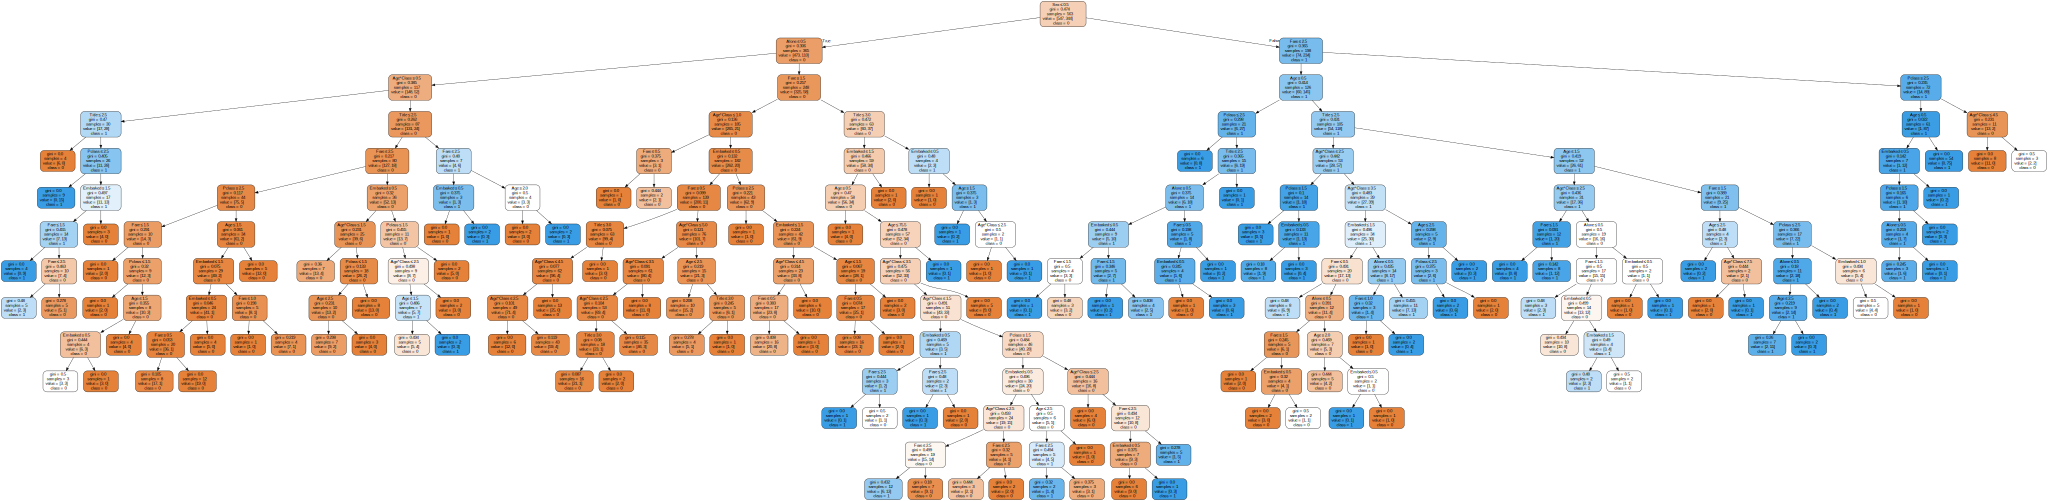

In [ ]:
import graphviz  
from sklearn.tree import export_graphviz  
dot_data= export_graphviz(random_forest.estimators_[10], out_file = None, 
                    feature_names = X_test.columns,  
                      class_names = ['0', '1'],  
                      filled = True, rounded = True,  
                      special_characters = True, impurity = True)  
graph = graphviz.Source(dot_data, format='png')  
graph

### Submission

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('./submission.cvs', index=False)

submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
